![example 6.2](assets/6.2_example_6.2.png)

In [17]:
import random

TRUE_STATE_VALUES = {
    'A': 1/6,
    'B': 2/6,
    'C': 3/6,
    'D': 4/6,
    'E': 5/6
}

state_list = ['left_terminal', 'A', 'B', 'C', 'D', 'E', 'right_terminal']
terminal_states = ['left_terminal', 'right_terminal']

INITIAL_STATE = 'C'

def get_next_state(state, action):
    if action == 'left':
        return state_list[state_list.index(state) - 1]
    else:
        return state_list[state_list.index(state) + 1]

def get_action():
    if random.random() < 0.5:
        return 'right'
    else:
        return 'left'
    
def get_reward(state, action):
    if state == 'E' and action == 'right':
        return 1
    else:
        return 0

def generate_episode():
    episode = []
    state = INITIAL_STATE
    while state not in terminal_states:
        action = get_action()
        next_state = get_next_state(state, action)
        reward = get_reward(state, action)
        episode.append((state, reward))
        state = next_state
    return episode

print(generate_episode())

[('C', 0), ('B', 0), ('C', 0), ('B', 0), ('A', 0)]


In [18]:
import numpy as np

def update_state_values_td(state_values, episode, alpha):
    for i in range(len(episode)):
        state, reward = episode[i]
        if i == len(episode) - 1:
            next_state_value = 0
        else:
            next_state, _ = episode[i + 1]
            next_state_value = state_values[next_state]
        
        error = reward + next_state_value - state_values[state]
        state_values[state] += alpha * error
    return state_values

def update_state_values_mc(state_values, episode, alpha):
    total_return = 0
    for state, reward in reversed(episode):
        total_return += reward
        state_values[state] += alpha * (total_return - state_values[state])

    return state_values

def calculate_rms_error(state_values, true_state_values):
    rms_error = 0
    for key, value in true_state_values.items():
        rms_error += (value - state_values[key]) ** 2
    rms_error = rms_error / len(true_state_values)
    rms_error = rms_error ** 0.5
    return rms_error

def run_learning(alpha, update_function, runs=100, episodes=100):
    rms_errors_over_runs = []
    for _ in range(runs):
        state_values = {
            'A': .5,
            'B': .5,
            'C': .5,
            'D': .5,
            'E': .5,
        }

        rms_errors = []

        for _ in range(episodes):
            episode = generate_episode()
            state_values = update_function(state_values, episode, alpha)
            rms_errors.append(calculate_rms_error(state_values, TRUE_STATE_VALUES))
        rms_errors_over_runs.append(rms_errors)

    average_rms_errors = np.mean(rms_errors_over_runs, axis=0)
    print(state_values)

    return average_rms_errors


{'A': 0.22078341182798322, 'B': 0.4112459570968356, 'C': 0.6000730777294895, 'D': 0.7486419002753867, 'E': 0.859962773544719}
{'A': 0.11242596581801037, 'B': 0.256343331737793, 'C': 0.4167039032627062, 'D': 0.6047302085087984, 'E': 0.7597346208000538}
{'A': 0.05092158352591496, 'B': 0.16530283199482432, 'C': 0.33212172742621393, 'D': 0.6101915436961586, 'E': 0.8455773684441543}
{'A': 0.25800885644707033, 'B': 0.27006584407671874, 'C': 0.4105471466849632, 'D': 0.6433778194043703, 'E': 0.742677362510723}
{'A': 0.12426976616731422, 'B': 0.1592966108688718, 'C': 0.31471182213016835, 'D': 0.5341222500399244, 'E': 0.7638917633266298}
{'A': 0.13218799119434033, 'B': 0.3089338089375024, 'C': 0.558648924207551, 'D': 0.7176071975771317, 'E': 0.8525789887907266}
{'A': 0.11707449094696645, 'B': 0.2978100422584999, 'C': 0.48642457849980003, 'D': 0.62779438025543, 'E': 0.8626717877614916}


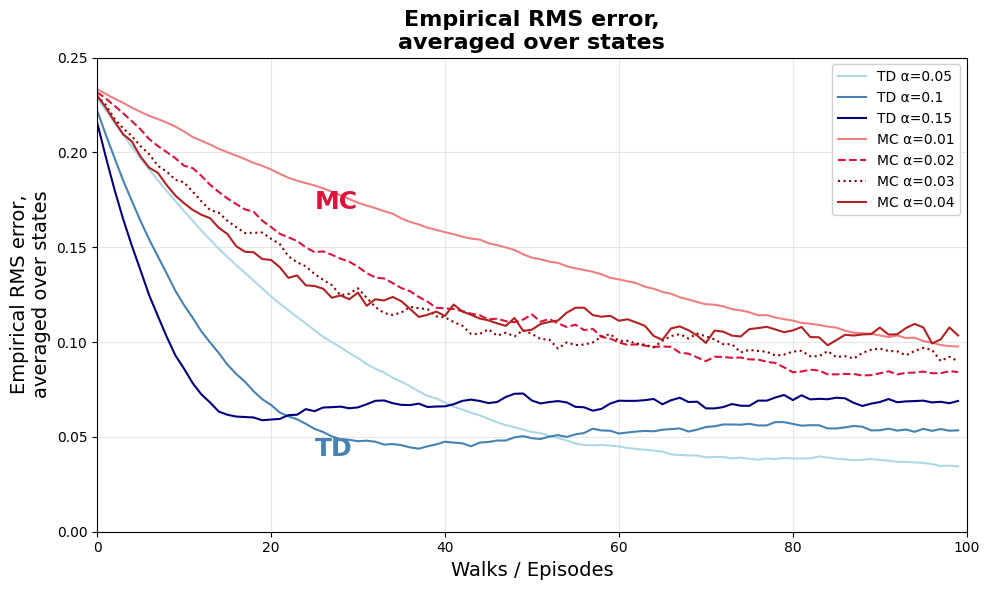

In [19]:
import matplotlib.pyplot as plt

rms_errors_td_05 = run_learning(0.05, update_state_values_td)
rms_errors_td_1 = run_learning(0.1, update_state_values_td)
rms_errors_td_15 = run_learning(0.15, update_state_values_td)

rms_errors_mc_01 = run_learning(0.01, update_state_values_mc)
rms_errors_mc_02 = run_learning(0.02, update_state_values_mc)
rms_errors_mc_03 = run_learning(0.03, update_state_values_mc)
rms_errors_mc_04 = run_learning(0.04, update_state_values_mc)

# Create figure with proper size
plt.figure(figsize=(10, 6))

# TD lines (varied blue colors, thinner lines)
plt.plot(rms_errors_td_05, color='lightblue', linestyle='-', linewidth=1.5, label='TD α=0.05')
plt.plot(rms_errors_td_1, color='steelblue', linestyle='-', linewidth=1.5, label='TD α=0.1')
plt.plot(rms_errors_td_15, color='navy', linestyle='-', linewidth=1.5, label='TD α=0.15')

# MC lines (varied red colors with different styles)
plt.plot(rms_errors_mc_01, color='lightcoral', linestyle='-', linewidth=1.5, label='MC α=0.01')
plt.plot(rms_errors_mc_02, color='crimson', linestyle='--', linewidth=1.5, label='MC α=0.02')
plt.plot(rms_errors_mc_03, color='darkred', linestyle=':', linewidth=1.5, label='MC α=0.03')
plt.plot(rms_errors_mc_04, color='firebrick', linestyle='-', linewidth=1.5, label='MC α=0.04')

# Add TD and MC group labels
plt.text(25, 0.04, 'TD', fontsize=18, color='steelblue', fontweight='bold')
plt.text(25, 0.17, 'MC', fontsize=18, color='crimson', fontweight='bold')

# Set axis limits and labels
plt.xlim(0, 100)
plt.ylim(0, 0.25)
plt.xlabel('Walks / Episodes', fontsize=14)
plt.ylabel('Empirical RMS error,\naveraged over states', fontsize=14)
plt.title('Empirical RMS error,\naveraged over states', fontsize=16, fontweight='bold')

# Add legend
plt.legend(loc='upper right', fontsize=10, framealpha=0.9)

# Grid and styling
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

{'A': 0.1661389616903822, 'B': 0.33309945920691386, 'C': 0.49964783357825293, 'D': 0.6658625141027862, 'E': 0.8333124023977256}
0.00046995537823731455


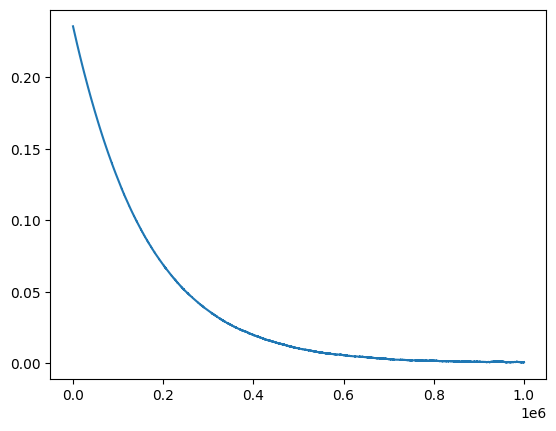

In [20]:
rms_errors = run_learning(0.00001, update_state_values_td, runs=1, episodes=1000000)
print(rms_errors[-1])
plt.plot(rms_errors)


### Exercise 6.3
From the results shown in the left graph of the random walk example it
appears that the first episode results in a change in only V (A). What does this tell you
about what happened on the first episode? Why was only the estimate for this one state
changed? By exactly how much was it changed?

In [21]:
# the value for state A goes down, nothing else changes.
# the episode must have been:
episode = [('C', 0), ('B', 0), ('A', 0)]
state_values = {
    'A': .5,
    'B': .5,
    'C': .5,
    'D': .5,
    'E': .5,
}

state_values = update_state_values_td(state_values, episode, .01)
for key, value in state_values.items():
    print(key, value)

print(f"The value for state A is {state_values['A']}, it changed by {state_values['A'] - .5}")

A 0.495
B 0.5
C 0.5
D 0.5
E 0.5
The value for state A is 0.495, it changed by -0.0050000000000000044
